In [2]:
pip install tensorflow

In [3]:
pip install pandas


In [4]:
pip install numpy

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [3]:
# Load the dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/ICT102/stockData_q4_dataset.csv'  # Replace with your actual file path
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ICT102/stockData_q4_dataset.csv')
data.head()

# Assuming your dataset has a column named 'Close' for stock prices
data = data[['Close']].values


In [4]:
# Feature Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [5]:
# Create sequences for time series data
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:(i + sequence_length), 0])
        y.append(data[i + sequence_length, 0])
    return np.array(X), np.array(y)


In [6]:
# Set the sequence length (number of previous days to use for prediction)
sequence_length = 10

# Create sequences and labels
X, y = create_sequences(data_scaled, sequence_length)

# Reshape X for input into LSTM (samples, time steps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [7]:
# Build the RNN model
model = Sequential()

# Add the first LSTM layer and some Dropout regularisation
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))

# Add a second LSTM layer and some Dropout regularisation
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Add a third LSTM layer and some Dropout regularisation
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Add a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units=50))
model.add(Dropout(0.2))


In [8]:
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model to the training data
model.fit(X, y, epochs=100, batch_size=32)

Epoch 1/100
32/32 [==============================] - 11s 41ms/step - loss: 0.0608
Epoch 2/100
32/32 [==============================] - 1s 37ms/step - loss: 0.0073
Epoch 3/100
32/32 [==============================] - 1s 27ms/step - loss: 0.0063
Epoch 4/100
32/32 [==============================] - 1s 26ms/step - loss: 0.0057
Epoch 5/100
32/32 [==============================] - 1s 27ms/step - loss: 0.0052
Epoch 6/100
32/32 [==============================] - 1s 27ms/step - loss: 0.0047
Epoch 7/100
32/32 [==============================] - 1s 27ms/step - loss: 0.0047
Epoch 8/100
32/32 [==============================] - 1s 27ms/step - loss: 0.0050
Epoch 9/100
32/32 [==============================] - 1s 27ms/step - loss: 0.0048
Epoch 10/100
32/32 [==============================] - 1s 28ms/step - loss: 0.0048
Epoch 11/100
32/32 [==============================] - 1s 27ms/step - loss: 0.0045
Epoch 12/100
32/32 [==============================] - 1s 27ms/step - loss: 0.0043
Epoch 13/100
32/32 [====

In [9]:
# Test the model by predicting stock prices on the last sequence
test_data = data_scaled[-sequence_length:]
test_data = np.reshape(test_data, (1, sequence_length, 1))
predicted_price = model.predict(test_data)

# Inverse transform the predicted price to get the actual price
predicted_price = scaler.inverse_transform(predicted_price)

print("Predicted Stock Price:", predicted_price[0, 0])

1/1 [==============================] - 3s 3s/step
Predicted Stock Price: 292.5478


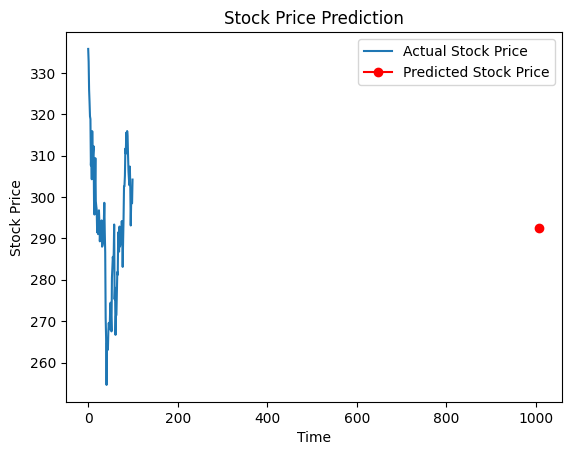

In [10]:
# Visualize the results
plt.plot(data[-100:], label='Actual Stock Price')
plt.plot(np.arange(len(data), len(data) + 1), predicted_price[0, 0], marker='o', color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

This code builds a simple RNN model using LSTM layers to predict stock prices. The model is trained on historical stock data, and then it predicts the stock price for the next time step. Adjust hyperparameters, such as the number of LSTM units, dropout rate, and training epochs, based on your specific requirements and dataset characteristics.